## Project Title: Banking Industry: Predicting Term Deposit Subscription


## Objective:
The objective of this project is to build a predictive model that estimates the likelihood of a customer subscribing to a term deposit based on historical marketing campaign data. This model will assist banking institutions in identifying potential clients for term deposits, allowing for more targeted and effective marketing campaigns.

## Significance:
Term deposits are important products for banks as they provide stable, long-term funding. Accurately predicting which clients are likely to subscribe to a term deposit can optimize marketing efforts, reduce campaign costs, and improve client satisfaction by offering relevant products. Through this project, my aim is to showcase skills in data preprocessing, feature engineering, and classification modeling, as well as in building an interactive dashboard using Streamlit to visualize predictions and insights.

## Dataset:
The dataset is derived from direct marketing campaigns conducted by a Portuguese banking institution. It includes 41,188 records with 20 features, covering various customer demographics (age, job, marital status, etc.), financial attributes (balance, loan, housing), and campaign-specific features (number of contacts, previous outcomes, etc.). The target variable (y) indicates whether a client subscribed to a term deposit ('yes' or 'no').

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

df = pd.read_csv('bank.csv', sep=';') 


In [2]:
#randomly selected 10 columns with reproduciability state = 999
df.sample(10, random_state=999)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
30370,59,admin.,married,high.school,no,yes,no,cellular,apr,thu,...,3,999,1,failure,-1.8,93.075,-47.1,1.365,5099.1,no
34765,38,technician,single,professional.course,no,yes,no,cellular,may,thu,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
14618,39,admin.,divorced,high.school,no,yes,no,cellular,jul,tue,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,yes
5673,31,blue-collar,married,basic.6y,unknown,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
37545,70,retired,married,professional.course,no,no,no,cellular,aug,fri,...,3,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,no
22715,51,services,married,unknown,no,no,yes,cellular,aug,fri,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
32146,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
20213,45,admin.,married,university.degree,no,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
20455,36,technician,single,university.degree,unknown,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
32998,40,services,married,high.school,unknown,yes,no,cellular,may,mon,...,5,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


## Dataset Features
### Client Attributes:
- Age: Numeric, client's age.
- Job: Categorical, includes 'admin.', 'blue-collar', 'entrepreneur', etc.
- Marital: Categorical, includes 'married', 'single', 'divorced', 'unknown'.
- Education: Categorical, includes 'basic.9y', 'high.school', 'university.degree', etc.
- Default: Binary, indicates if the client has credit in default ('yes', 'no').
- Housing: Binary, indicates if the client has a housing loan ('yes', 'no').
- Loan: Binary, indicates if the client has a personal loan ('yes', 'no').

### Contact Attributes:
- Contact: Categorical, type of communication used ('cellular', 'telephone').
- Month: Categorical, month of the last contact ('jan', 'feb', 'mar', etc.).
- Day_of_week: Categorical, day of the week of the last contact ('mon', 'tue', 'wed', etc.).
- Duration: Numeric, duration of the last contact in seconds.

### Campaign Attributes:
- Campaign: Numeric, number of contacts performed during this campaign for this client.
- Pdays: Numeric, days since the client was last contacted from a previous campaign (999 if never contacted).
- Previous: Numeric, number of contacts performed before this campaign for this client.
- Poutcome: Categorical, outcome of the previous campaigns ('nonexistent', 'success', 'failure').

### Social and Economic Context Attributes:
- Emp.var.rate: Numeric, employment variation rate (quarterly).
- Cons.price.idx: Numeric, consumer price index (monthly).
- Cons.conf.idx: Numeric, consumer confidence index (monthly).
- Euribor3m: Numeric, Euribor 3 month rate (daily).
- Nr.employed: Numeric, number of employees (quarterly).

### Output Variable (Target):
- y: Binary, indicates if the client subscribed to a term deposit ('yes', 'no').

In [3]:
from tabulate import tabulate

# Define the dataset features along with their details
data = [
    ["age", "Numeric", "Years", "Age of the client"],
    ["job", "Nominal Categorical", "NA", "Type of job (e.g., admin., blue-collar)"],
    ["marital", "Nominal Categorical", "NA", "Marital status of the client"],
    ["education", "Ordinal Categorical", "NA", "Education level of the client (e.g., high school)"],
    ["default", "Binary", "NA", "Indicates if the client has credit in default"],
    ["housing", "Binary", "NA", "Indicates if the client has a housing loan"],
    ["loan", "Binary", "NA", "Indicates if the client has a personal loan"],
    ["contact", "Nominal Categorical", "NA", "Type of communication contact (telephone, cellular)"],
    ["month", "Nominal Categorical", "NA", "Last contact month of the year"],
    ["day_of_week", "Nominal Categorical", "NA", "Last contact day of the week"],
    ["duration", "Numeric", "Seconds", "Duration of the last contact in seconds"],
    ["campaign", "Numeric", "NA", "Number of contacts performed during this campaign"],
    ["pdays", "Numeric", "Days", "Number of days that passed by after the client was last contacted from a previous campaign"],
    ["previous", "Numeric", "NA", "Number of contacts performed before this campaign"],
    ["poutcome", "Nominal Categorical", "NA", "Outcome of the previous marketing campaigns"],
    ["emp.var.rate", "Numeric", "NA", "Employment variation rate (quarterly indicator)"],
    ["cons.price.idx", "Numeric", "NA", "Consumer price index (monthly indicator)"],
    ["cons.conf.idx", "Numeric", "NA", "Consumer confidence index (monthly indicator)"],
    ["euribor3m", "Numeric", "NA", "Euribor 3 month rate (daily indicator)"],
    ["nr.employed", "Numeric", "NA", "Number of employees (quarterly indicator)"],
    ["y", "Binary", "NA", "Has the client subscribed to a term deposit? (yes, no)"]
]

# Define headers for the table
headers = ["Name of the Feature", "Data Type", "Units", "Brief Description"]

# Create and display the table
table = tabulate(data, headers, tablefmt="grid")
print(table)

+-----------------------+---------------------+---------+--------------------------------------------------------------------------------------------+
| Name of the Feature   | Data Type           | Units   | Brief Description                                                                          |
+=======================+=====================+=========+============================================================================================+
| age                   | Numeric             | Years   | Age of the client                                                                          |
+-----------------------+---------------------+---------+--------------------------------------------------------------------------------------------+
| job                   | Nominal Categorical | NA      | Type of job (e.g., admin., blue-collar)                                                    |
+-----------------------+---------------------+---------+-------------------------------------

### Goals and Objectives
**Goal:** The objective of this project is to develop a predictive model that estimates the likelihood of a customer subscribing to a term deposit based on demographic, financial, and campaign-related features. We use the Random Forest algorithm for its robustness and ability to handle diverse feature types effectively.

**The project involves:** 

- Data Preprocessing: Encoding categorical features, handling class imbalance, and splitting data into training and testing sets.
- Model Training and Evaluation: Using Random Forest to classify clients as potential term deposit subscribers, evaluating the model with metrics such as accuracy, AUC-ROC, precision, and recall.
- Feature Importance Analysis: Identifying the most significant features that influence subscription likelihood, providing valuable insights into customer behavior.
- Dashboard Creation: Developing an interactive dashboard with Streamlit to allow users to input customer data, view predictions, and explore feature importances and demographic insights.


This model serves as a decision-support tool for banking institutions, allowing for more targeted marketing campaigns and enhanced client engagement by focusing on clients most likely to subscribe to term deposits.

In [4]:
#to know the shape of data (row, column)
df.shape

(41188, 21)

In [5]:
#to know the data type
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
#to know the missing value
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

The presence of a zero as a value does not imply the absence of a missing value; rather, it suggests that the missing value might be represented by a different identifier than NaN. Through comprehensive analysis, we must identify these missing values.



### Data Cleaning and Preprocessing

To check the whitepace or irregular formatting in column name

In [7]:
# Rename columns to meaningful names and format them
df.rename(columns={
    'job': 'job_type',
    'marital': 'marital_status',
    'education': 'education_level',
    'housing': 'housing_loan',
    'loan': 'personal_loan',
    'contact': 'contact_type',
    'month': 'last_contact_month',
    'day_of_week': 'last_contact_day',
    'campaign': 'contacts_during_campaign',
    'pdays': 'days_since_last_contact',
    'previous': 'contacts_before_campaign',
    'poutcome': 'previous_campaign_outcome',
    'emp.var.rate': 'employment_variation_rate',
    'cons.price.idx': 'consumer_price_index',
    'cons.conf.idx': 'consumer_confidence_index',
    'euribor3m': 'euribor_3_month_rate',
    'nr.employed': 'number_of_employees',
    'y': 'y'
}, inplace=True)

# Make all column names lowercase and replace spaces with underscores
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# Now your DataFrame 'df' has the columns renamed and formatted properly.
print(df.columns)

Index(['age', 'job_type', 'marital_status', 'education_level', 'default',
       'housing_loan', 'personal_loan', 'contact_type', 'last_contact_month',
       'last_contact_day', 'duration', 'contacts_during_campaign',
       'days_since_last_contact', 'contacts_before_campaign',
       'previous_campaign_outcome', 'employment_variation_rate',
       'consumer_price_index', 'consumer_confidence_index',
       'euribor_3_month_rate', 'number_of_employees', 'y'],
      dtype='object')


In [8]:
# Identifying categorical columns in the DataFrame
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['job_type', 'marital_status', 'education_level', 'default',
       'housing_loan', 'personal_loan', 'contact_type', 'last_contact_month',
       'last_contact_day', 'previous_campaign_outcome', 'y'],
      dtype='object')


In [9]:
# use the statistical method to know more about the data
df.describe(include=np.number).round(2)

,age,duration,contacts_during_campaign,days_since_last_contact,contacts_before_campaign,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_month_rate,number_of_employees
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [10]:
# use describe method to know about the categorical variable
df.describe(include=object)

,job_type,marital_status,education_level,default,housing_loan,personal_loan,contact_type,last_contact_month,last_contact_day,previous_campaign_outcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Checking for unique values in the column helps identify any persistent missing values.

In [11]:
# Check unique values in each column
for col in df.columns:
    unique_values = df[col].unique()
    num_unique_values = len(unique_values)
    print(f"Column '{col}' has {num_unique_values} unique values")
    print("Unique values:", unique_values)
    print("\n")

Column 'age' has 78 unique values
Unique values: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


Column 'job_type' has 12 unique values
Unique values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


Column 'marital_status' has 4 unique values
Unique values: ['married' 'single' 'divorced' 'unknown']


Column 'education_level' has 8 unique values
Unique values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


Column 'default' has 3 unique values
Unique values: ['no' 'unknown' 'yes']


Column 'housing_loan' has 3 unique values
Unique values: ['no' 'yes' 'unknown']


Column 'personal_loan' has 3 unique values
Unique values: ['no' '

To enhance the job type variable, we'll remove special characters and underscores, and then convert it to lowercase."

In [12]:
# Convert 'job_type' to lowercase
df['job_type'] = df['job_type'].str.lower()

# Remove any special characters (keep only alphanumeric and spaces)
df['job_type'] = df['job_type'].str.replace('[^\w\s]', '', regex=True)

# Replace spaces with underscores
df['job_type'] = df['job_type'].str.replace('\s+', '_', regex=True)

### Removing the missing value

To get the proper analysis we remove the unknown values, as per this unknown values are consider missing values so we remove the missing values to enhance the prediction.

using the value count method to know the unknown value count then we can understand impact of those value in our dataset to decide how to handle this value

In [13]:
df['job_type'].value_counts(normalize=True).mul(100).round(2)

admin           25.30
bluecollar      22.47
technician      16.37
services         9.64
management       7.10
retired          4.18
entrepreneur     3.54
selfemployed     3.45
housemaid        2.57
unemployed       2.46
student          2.12
unknown          0.80
Name: job_type, dtype: float64

In [14]:
df['marital_status'].value_counts(normalize=True).mul(100).round(2)

married     60.52
single      28.09
divorced    11.20
unknown      0.19
Name: marital_status, dtype: float64

In [15]:
df['education_level'].value_counts(normalize=True).mul(100).round(2)

university.degree      29.54
high.school            23.10
basic.9y               14.68
professional.course    12.73
basic.4y               10.14
basic.6y                5.56
unknown                 4.20
illiterate              0.04
Name: education_level, dtype: float64

In [16]:
df['default'].value_counts(normalize=True).mul(100).round(3)

no         79.120
unknown    20.873
yes         0.007
Name: default, dtype: float64

In [17]:
df['housing_loan'].value_counts(normalize=True).mul(100).round(3)

yes        52.384
no         45.212
unknown     2.404
Name: housing_loan, dtype: float64

In [18]:
df['personal_loan'].value_counts(normalize=True).mul(100).round(3)

no         82.427
yes        15.169
unknown     2.404
Name: personal_loan, dtype: float64

In [19]:
df['contact_type'].value_counts(normalize=True).mul(100).round(3)

cellular     63.475
telephone    36.525
Name: contact_type, dtype: float64

In [20]:
df['last_contact_month'].value_counts(normalize=True).mul(100).round(3)

may    33.430
jul    17.418
aug    15.000
jun    12.912
nov     9.957
apr     6.390
oct     1.743
sep     1.384
mar     1.326
dec     0.442
Name: last_contact_month, dtype: float64

In [21]:
df['last_contact_day'].value_counts(normalize=True).mul(100).round(3)

thu    20.936
mon    20.671
wed    19.748
tue    19.642
fri    19.003
Name: last_contact_day, dtype: float64

In [22]:
df['previous_campaign_outcome'].value_counts(normalize=True).mul(100).round(3)

nonexistent    86.343
failure        10.323
success         3.333
Name: previous_campaign_outcome, dtype: float64

### Removing Default column

The 'default' column is marred by a high proportion of missing data, comprising 20% 'unknown' values, which could skew the predictive model by adding noise. Additionally, its predictive value appears redundant, as other variables in the dataset like 'housing', 'loan', and socio-economic factors are likely to provide similar insights into a client's financial standing.

In [23]:
# Remove the 'default' column
df.drop('default', axis=1, inplace=True)

### Removing unknown value

as we count the unknown values for each variable that is less than 2 percent so that is not impact much on analysis so we remove that missing value is good idea instead impute the missing value

In [24]:
df = df[df['job_type'] != "unknown"]
df = df[df['marital_status'] != "unknown"]
df = df[df['education_level'] != "unknown"]
df = df[df['housing_loan'] != "unknown"]
df = df[df['personal_loan'] != "unknown"]
df.shape

(38245, 20)

### Reason for Removing duration Column

The duration of a call can only be known after the call has been completed. Since future calls have no prior duration, this feature cannot be used in a predictive model intended to be applied in a real-world setting. Using duration as a predictor would lead to a model that cannot be used in practice because it would require knowledge of the outcome (whether the call resulted in a subscription) to predict the outcome, which is a form of circular reasoning.

In [25]:
# Remove the 'duration' column
df.drop('duration', axis=1, inplace=True)
df.shape

(38245, 19)

In [26]:
# Display unique values and their frequency
pdays_counts = df['days_since_last_contact'].value_counts()
print("Unique values and their frequency:\n", pdays_counts)

Unique values and their frequency:
 999    36879
3        393
6        379
4        106
2         57
9         55
12        53
7         52
5         45
10        44
13        33
11        26
1         24
15        22
14        18
0         15
8         14
16         8
17         6
18         5
22         3
19         3
21         2
25         1
26         1
27         1
Name: days_since_last_contact, dtype: int64


### Change pdays as binary

The 999 value in the pdays column signifies that there was no previous contact with the client, but treating it as a numerical value can mislead the predictive model because it stands out as an outlier. By converting pdays into a binary indicator, we clearly differentiate between clients with and without prior contact, thus improving the model's effectiveness and avoiding confusion caused by the high numerical value of 999.

In [27]:
# Convert 'pdays' to a binary indicator within the same DataFrame
df['days_since_last_contact'] = df['days_since_last_contact'].apply(lambda x: 0 if x == 999 else 1)

# Verify the transformation
print("Unique values in the 'pdays' after transformation:", df['days_since_last_contact'].unique())
print(df['days_since_last_contact'].value_counts())

Unique values in the 'pdays' after transformation: [0 1]
0    36879
1     1366
Name: days_since_last_contact, dtype: int64


To categorizes the age variable into three groups: "young" for ages 0-29, "middle-aged" for ages 30-59, and "old" for ages 60 and above, providing a simple and intuitive understanding of the age distribution within the dataset.

In [28]:
# Define the bins for the age categories
bins = [0, 30, 60, 100]  # Adjust the ranges as appropriate
labels = ['young', 'middle-aged', 'old']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

print(df[['age', 'age_group']].head())

# Remove the 'age' column
df.drop('age', axis=1, inplace=True)

   age    age_group
0   56  middle-aged
1   57  middle-aged
2   37  middle-aged
3   40  middle-aged
4   56  middle-aged


In [29]:
#randomly selected 10 columns with reproduciability state = 999
df.sample(10, random_state=999)

,job_type,marital_status,education_level,housing_loan,personal_loan,contact_type,last_contact_month,last_contact_day,contacts_during_campaign,days_since_last_contact,contacts_before_campaign,previous_campaign_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_month_rate,number_of_employees,y,age_group
15075,entrepreneur,married,basic.4y,yes,no,cellular,jul,thu,1,0,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,middle-aged
33352,bluecollar,married,basic.9y,no,no,cellular,may,tue,5,0,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,no,middle-aged
19461,technician,married,university.degree,no,yes,cellular,aug,thu,1,0,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no,middle-aged
1929,bluecollar,married,basic.4y,yes,no,telephone,may,fri,2,0,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,middle-aged
31966,services,married,high.school,yes,no,cellular,may,thu,2,0,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,no,middle-aged
41083,technician,single,university.degree,yes,yes,cellular,nov,tue,3,1,3,failure,-1.1,94.767,-50.8,1.049,4963.6,yes,young
18684,services,single,high.school,no,no,cellular,jul,thu,35,0,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,middle-aged
38493,services,married,high.school,no,no,cellular,oct,tue,1,0,1,failure,-3.4,92.431,-26.9,0.728,5017.5,yes,young
24786,technician,married,basic.9y,yes,no,cellular,nov,tue,1,0,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no,middle-aged
2902,bluecollar,married,basic.4y,yes,no,telephone,may,wed,1,0,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no,middle-aged


## Data Exploration and Visualisation

data cleaning and preprocessing is done to handle the missing values and changing data type , now we move further for data visualization

### Univariate Visualisation
To visualise the numerical variable to ensure the dataset has any outlier

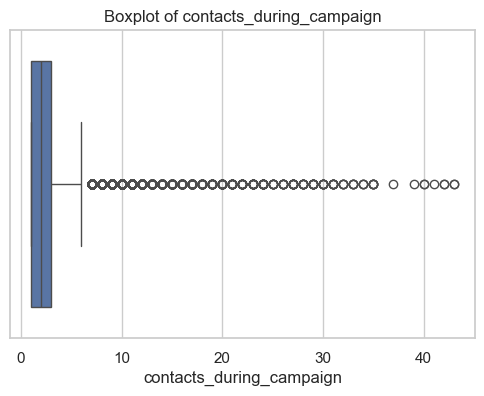

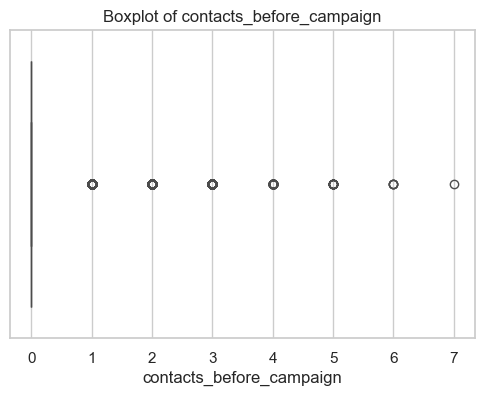

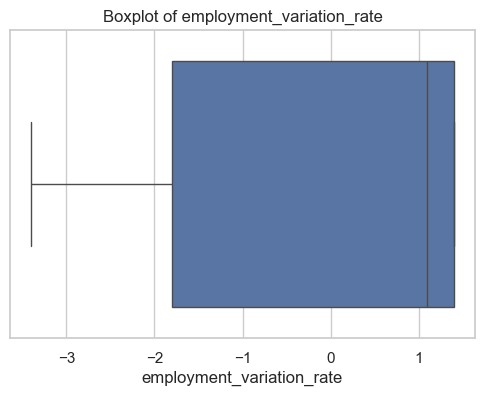

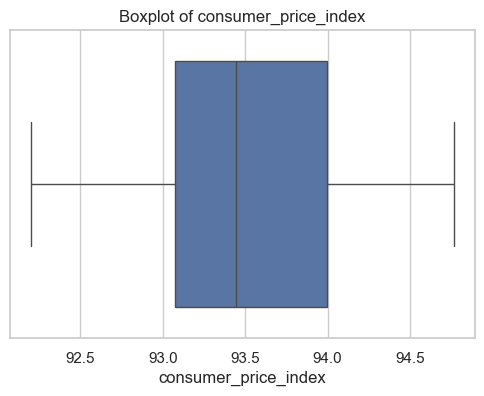

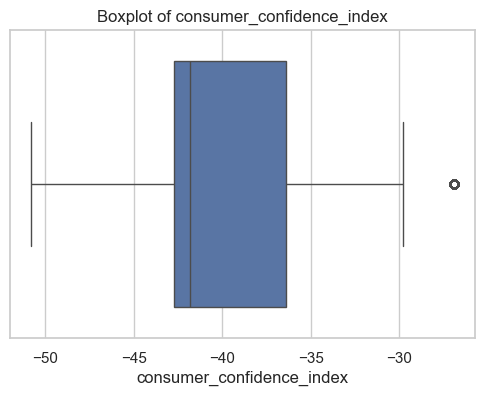

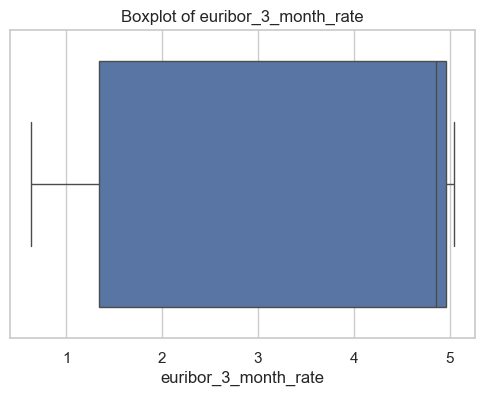

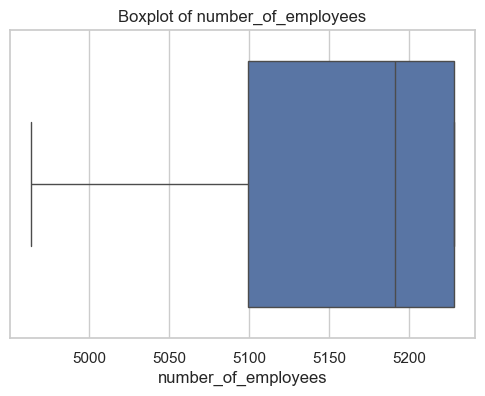

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your pandas DataFrame with the appropriate data loaded.

# Define your columns
columns = [ 'contacts_during_campaign', 'contacts_before_campaign', 'employment_variation_rate', 'consumer_price_index', 'consumer_confidence_index', 'euribor_3_month_rate', 'number_of_employees']

# Set the style for the plots
sns.set(style="whitegrid")

# Loop over each column and create a separate boxplot
for col in columns:
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed for readability
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')  # Set the title for each boxplot
    plt.show()  # Show each plot one after the other

The 'campaign' outliers represent a few clients contacted more than usual, likely from targeted marketing tactics. The 'consumer_confidence_index' outlier shows a notably low consumer confidence value, a vital economic measure. Therefore these are all not potential outlier to address.

### Bar chart for job
To know which profession is most contact by marketing team, as we evient from the graph that admin , blue collar , technician are targeted job

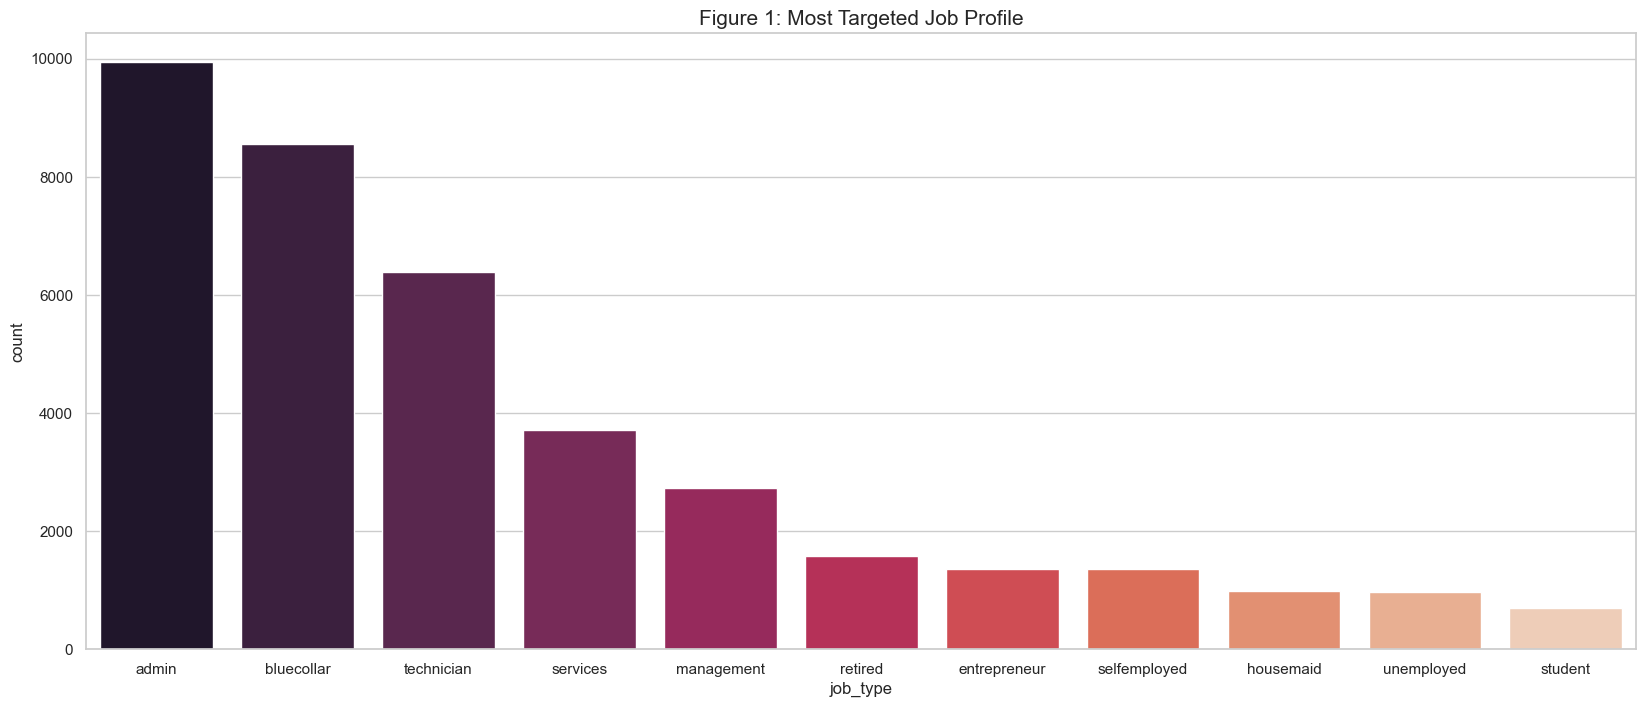

In [31]:
plt.figure(figsize = (20,8))
fig = sns.countplot(x = 'job_type', data = df, palette = 'rocket', 
                    order = df['job_type'].value_counts().index)
fig = plt.title('Figure 1: Most Targeted Job Profile', fontsize = 15)
plt.show()


## Bar chart for age group

To know which age group is targeted by marketing team, middle age group is most targeted due to their financial stability

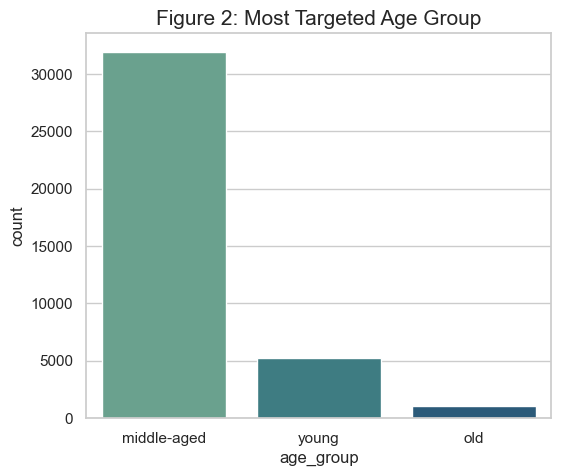

In [32]:
plt.figure(figsize = (6,5))
fig = sns.countplot(x = 'age_group', data = df, palette = "crest", order = df['age_group'].value_counts().index)
fig = plt.title('Figure 2: Most Targeted Age Group', fontsize = 15)
plt.show()

## Pie chart for housing and personal loan
to know the proportion of housing and personal loan, later we can predict how these would impact on their decision of customer to subscribe the product

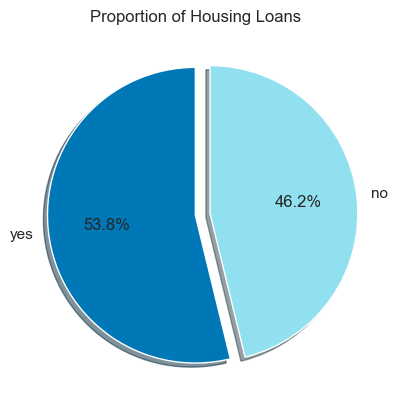

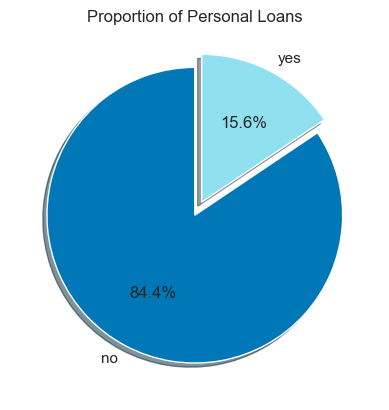

In [33]:
# Function to create a pie chart for a given attribute
def create_pie_chart(attribute, title):
    counts = df[attribute].value_counts()
    colors = ['#0077B6', '#90E0EF']  # Blue for 'no', orange for 'yes'
    explode = (0, 0.1)  # Explode the second slice ('yes')
    fig, ax = plt.subplots()
    ax.pie(counts, labels=counts.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
    ax.set_title(title)
    plt.show()

# Create a pie chart for 'Housing'
create_pie_chart('housing_loan', 'Proportion of Housing Loans')

# Create a pie chart for 'Loan'
create_pie_chart('personal_loan', 'Proportion of Personal Loans')

## Two-Variable Visualisation

#### stacked bar chart for job type with subscription

we can observe that students have surprisingly subscribed to term deposits at a higher rate compared to other job categories

<Figure size 1400x800 with 0 Axes>

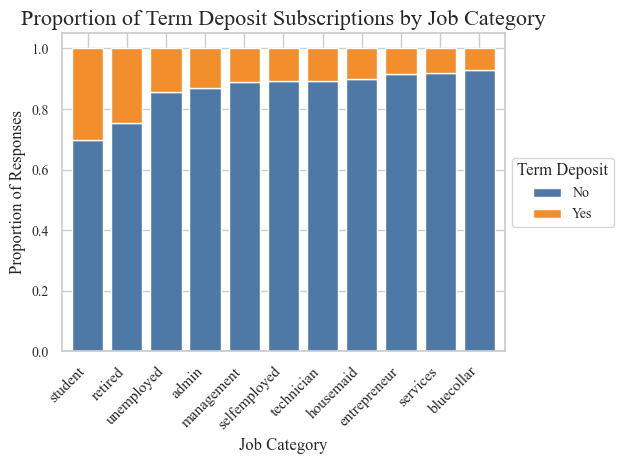

In [34]:
from matplotlib import rcParams

# Set font in times new roman
rcParams['font.family'] = 'Times New Roman'

# using group function to know proportion of yes and no in each job category
job_counts = df.groupby('job_type')['y'].value_counts(normalize=True).unstack()
job_counts = job_counts.sort_values(by='yes', ascending=False)  # Sort by yes for better comparison


plt.figure(figsize=(14, 8))

# giving colour palete for visual appearnce
job_counts.plot(kind='bar', stacked=True, width=0.8, color=['#4e79a7', '#f28e2b'])

# Enhance the visuals
plt.title('Proportion of Term Deposit Subscriptions by Job Category', fontsize=16)
plt.xlabel('Job Category', fontsize=12)
plt.ylabel('Proportion of Responses', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.yticks(fontsize=10)

# Place the legend outside of the plot to the right for better readability
plt.legend(title='Term Deposit', labels=['No', 'Yes'], fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

# Show the plot
plt.show()

### Boxplot for number of times contact for subscription

The box plot shows that people who subscribe to term deposits usually need fewer, similar contact attempts, while those who don't subscribe are contacted more times and more irregularly.



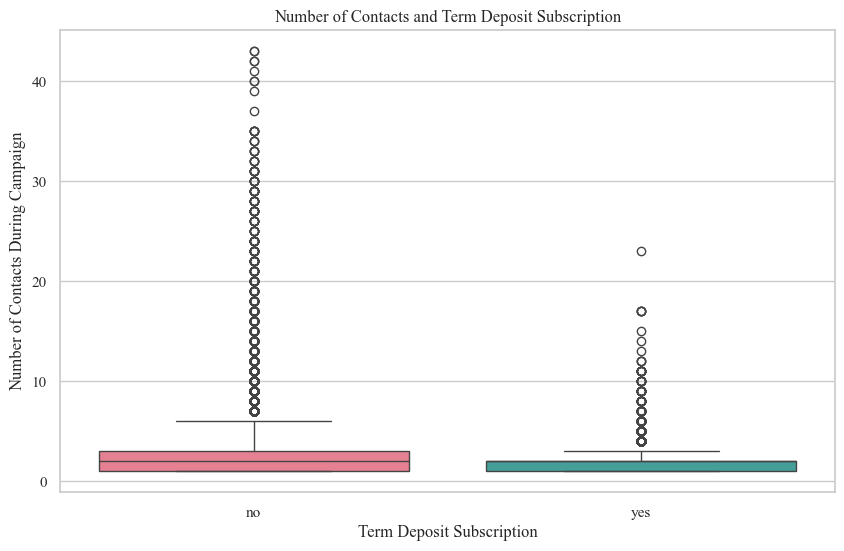

In [35]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='contacts_during_campaign', data=df, palette='husl')

# Set the title and labels
plt.title('Number of Contacts and Term Deposit Subscription')
plt.xlabel('Term Deposit Subscription')
plt.ylabel('Number of Contacts During Campaign')

# Show the plot
plt.show()

## Three-variable visualisation
### Bar Chart for Average Euribor 3M Rate by Job Category and Subscription Status:

This bar chart delineates that the average Euribor 3M rate tends to be lower for individuals who have subscribed across various job categories, suggesting a potential correlation between interest rates and subscription choices.

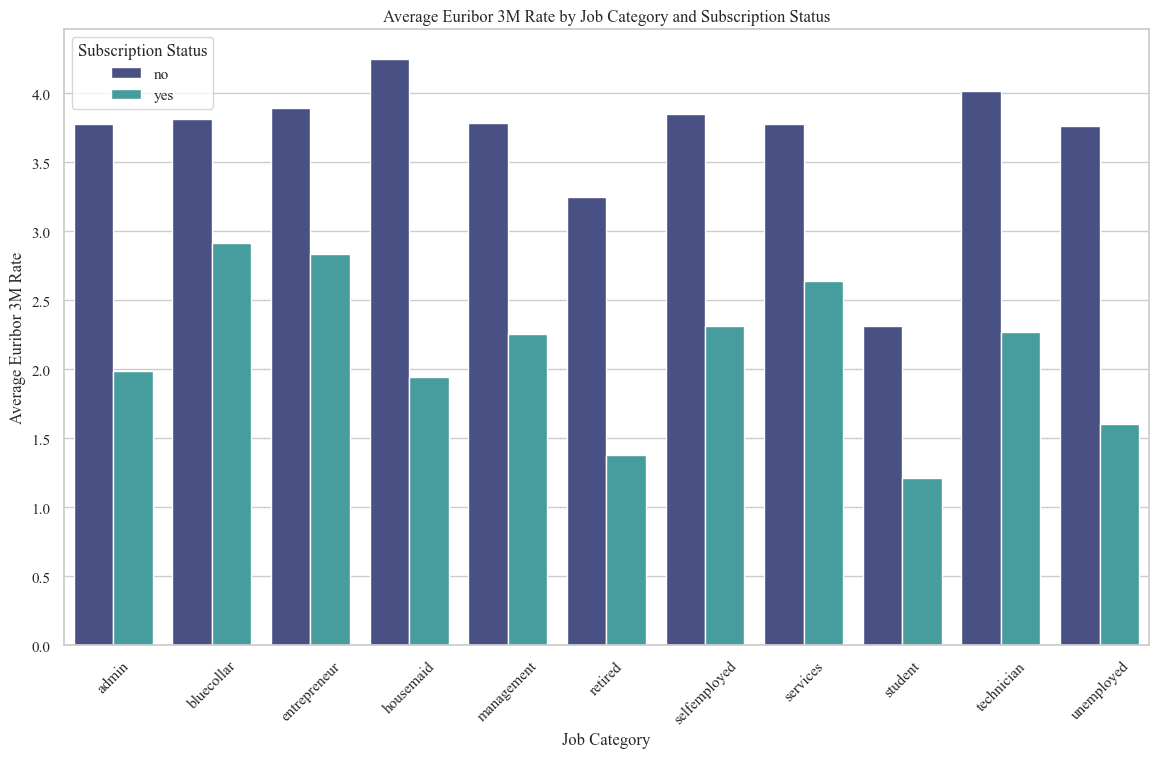

In [36]:
# Compute the mean Euribor 3 month rate for each job category and subscription status
grouped_data = df.groupby(['job_type', 'y'])['euribor_3_month_rate'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='job_type', y='euribor_3_month_rate', hue='y', data=grouped_data, palette='mako')

# Adding the aesthetics
plt.title('Average Euribor 3M Rate by Job Category and Subscription Status')
plt.xlabel('Job Category')
plt.ylabel('Average Euribor 3M Rate')
plt.xticks(rotation=45)  # Rotate the job category labels for better readability
plt.legend(title='Subscription Status')

# Show the plot
plt.show()


### Heat map of Subscription Rate by Job Category and Day of the Week:

The heat map reveals distinct patterns in subscription rates across job categories, with retirees and students displaying notably higher rates on certain days, indicating possible targeted days for successful marketing.

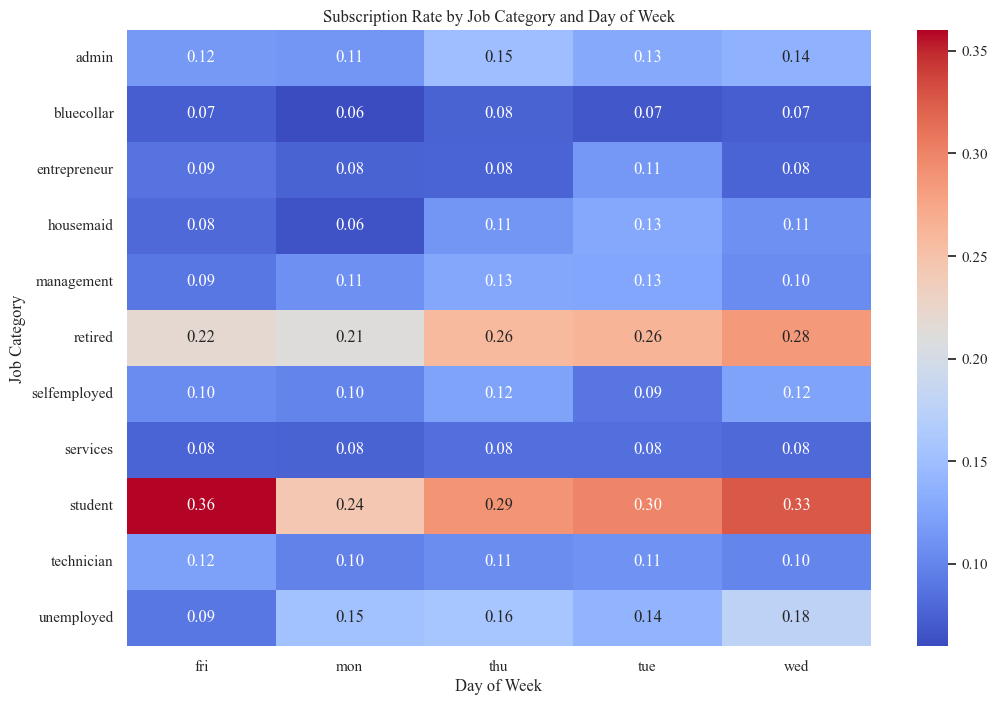

In [37]:
# Convert 'y' to numeric binary format (1 for 'yes', 0 for 'no')
df['subscription'] = (df['y'] == 'yes').astype(int)

# Group the data by 'job' and 'day_of_week' and calculate the subscription rate
# Here we count the number of 'yes' responses and divide by the total occurrences
subscription_rate = df.groupby(['job_type', 'last_contact_day'])['subscription'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(subscription_rate, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Subscription Rate by Job Category and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Job Category')

# Display the heatmap
plt.show()

### Bar Chart of Subscription Rates by Education Level and Marital Status:

This bar chart illustrates that individuals with university degrees and illiterate individuals have higher subscription rates, and marital status further influences these rates, especially notable in the married and divorced categories.

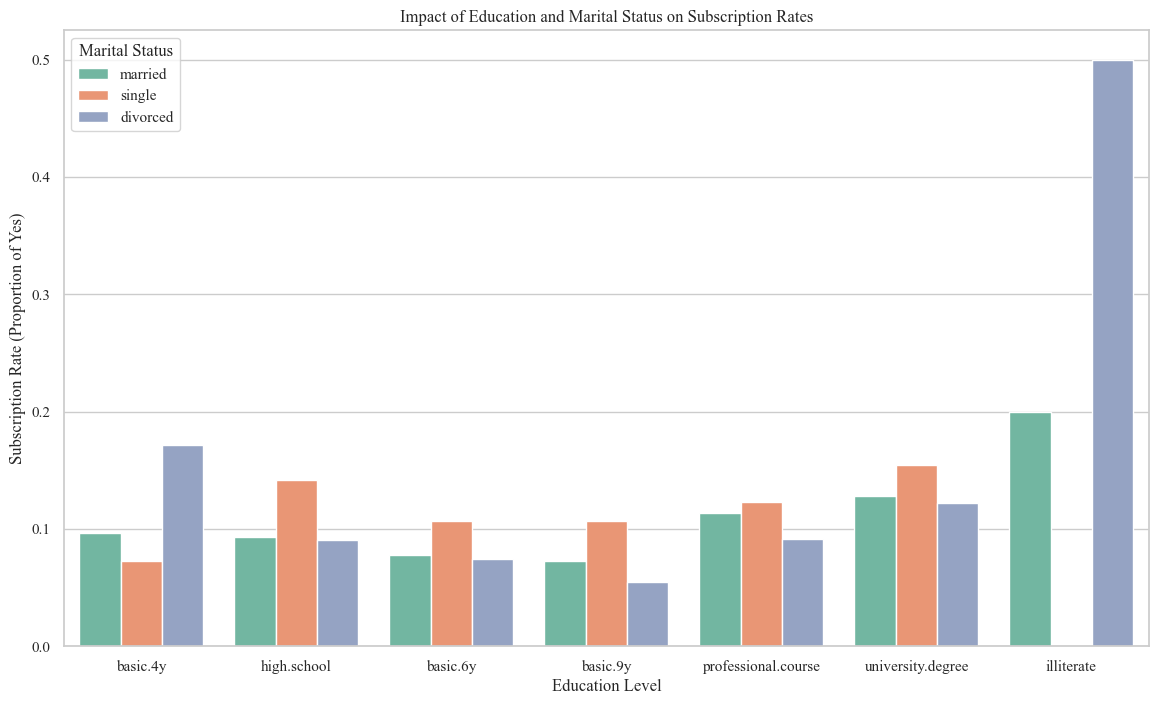

In [38]:
# Convert 'y' to a binary format for easier processing, if not already done
df['y_binary'] = (df['y'] == 'yes').astype(int)

# Creating a grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='education_level', y='y_binary', hue='marital_status', palette='Set2', ci=None)

# Enhancing the plot
plt.title('Impact of Education and Marital Status on Subscription Rates')
plt.xlabel('Education Level')
plt.ylabel('Subscription Rate (Proportion of Yes)')
plt.legend(title='Marital Status')

plt.show()

In [39]:
df.shape


(38245, 21)

### Drop subscription and y_binary
In the cleaned DataFrame, I found the columns subscription and y_binary, which were introduced during the visualization in phase 1. These columns are target features containing the same information. Therefore, I removed these two columns and kept y as the target column. I then encoded the target column properly.

In [40]:
df.columns

Index(['job_type', 'marital_status', 'education_level', 'housing_loan',
       'personal_loan', 'contact_type', 'last_contact_month',
       'last_contact_day', 'contacts_during_campaign',
       'days_since_last_contact', 'contacts_before_campaign',
       'previous_campaign_outcome', 'employment_variation_rate',
       'consumer_price_index', 'consumer_confidence_index',
       'euribor_3_month_rate', 'number_of_employees', 'y', 'age_group',
       'subscription', 'y_binary'],
      dtype='object')

In [41]:
# To remove the 'subscription' and 'y_binary' columns
df.drop(['subscription', 'y_binary'], axis=1, inplace=True)

### Grouping Job Type

Grouping job types before encoding helps to avoid misinterpretation of categorical data in models by preventing false ordinal assumptions. This method enhances statistical relevance by ensuring that categories are robust enough for meaningful analysis and aligns the data more closely with real-world group behaviors, thereby improving both model performance and interpretability in business contexts

In [42]:
def group_job_types(job):
    if job in ['admin', 'management', 'technician']:
        return 'white_collar'
    elif job in ['bluecollar', 'services', 'housemaid']:
        return 'blue_collar'
    elif job in ['entrepreneur', 'selfemployed']:
        return 'own_business'
    else:
        return 'other'  # Grouping 'retired', 'unemployed', 'student' into 'other'

# Apply the function to the job_type column
df['job_type'] = df['job_type'].apply(group_job_types)

# Check the new distribution of job types
print(df['job_type'].value_counts())

white_collar    19045
blue_collar     13263
other            3228
own_business     2709
Name: job_type, dtype: int64


### Grouping education type
I grouped the education levels to streamline the categories into broader, more meaningful groups that reflect the general educational attainment of individuals. This reduces the complexity in our model, increases the robustness of statistical analysis, and improves the predictive accuracy by eliminating sparse and less informative categories.

In [43]:
def group_education(level):
    if level in ['basic.4y', 'basic.6y', 'basic.9y']:
        return 'Basic'
    elif level in ['university.degree', 'professional.course']:
        return 'Higher_Education'
    elif level == 'high.school':
        return 'High_School'
    else:
        return 'illiterate'

# Apply the function to the education_level column
df['education_level'] = df['education_level'].apply(group_education)

# Check the new distribution of education levels
print(df['education_level'].value_counts())

Higher_Education    16921
Basic               12062
High_School          9244
illiterate             18
Name: education_level, dtype: int64


### Grouping month
Partitioning months into quarters simplifies data, reducing model complexity and enhancing computational efficiency. This approach aids in identifying seasonal trends, such as sales cycles or customer engagement patterns, and facilitates easier business analysis and reporting aligned with financial quarters.



In [44]:
# Create a dictionary to map each month to its quarter
month_to_quarter = {
    'jan': 'Q1', 'feb': 'Q1', 'mar': 'Q1',
    'apr': 'Q2', 'may': 'Q2', 'jun': 'Q2',
    'jul': 'Q3', 'aug': 'Q3', 'sep': 'Q3',
    'oct': 'Q4', 'nov': 'Q4', 'dec': 'Q4'
}

# Apply this mapping to the DataFrame column
df['last_contact_month'] = df['last_contact_month'].map(month_to_quarter)

# Verify the new distribution
print(df['last_contact_month'].value_counts())

Q2    20076
Q3    12954
Q4     4718
Q1      497
Name: last_contact_month, dtype: int64


## Encoding the Target Feature
We remove the "y" feature from data and call it "target". The rest of the features are the descriptive features which we call "Data"

In [45]:
Data = df.drop(columns='y')
target = df['y']
target.value_counts()

no     33987
yes     4258
Name: y, dtype: int64

we always need to choose the positive class as 1, so if a client subscribes to a term deposit (yes), we encode it as 1

In [46]:
target = target.replace({'no': 0, 'yes': 1})
target.value_counts()

0    33987
1     4258
Name: y, dtype: int64

## Encoding Categorical Descriptive Features
In our dataset, we've employed one-hot encoding for most categorical features, turning them into a format that's usable for predictive modeling. For binary features like 'housing_loan' and 'personal_loan', we've created single binary variables, simplifying the model without losing information. Features with more than two categories, such as 'job_type' and 'education_level', have also been one-hot encoded to ensure each category is represented without implying any order. This strategy is critical for allowing the model to accurately assess the impact of each category independently, enhancing both the reliability and interpretability of our predictive analysis.

In [47]:
categorical_cols = Data.columns[Data.dtypes==object].tolist()

In [48]:
categorical_cols

['job_type',
 'marital_status',
 'education_level',
 'housing_loan',
 'personal_loan',
 'contact_type',
 'last_contact_month',
 'last_contact_day',
 'previous_campaign_outcome']

In [49]:
for col in categorical_cols:
    if (Data[col].nunique() == 2):
        Data[col] = pd.get_dummies(Data[col], drop_first=True)
   
# use one-hot-encoding for categorical features with >2 levels
Data = pd.get_dummies(Data)

In [50]:
Data.columns

Index(['housing_loan', 'personal_loan', 'contact_type',
       'contacts_during_campaign', 'days_since_last_contact',
       'contacts_before_campaign', 'employment_variation_rate',
       'consumer_price_index', 'consumer_confidence_index',
       'euribor_3_month_rate', 'number_of_employees', 'job_type_blue_collar',
       'job_type_other', 'job_type_own_business', 'job_type_white_collar',
       'marital_status_divorced', 'marital_status_married',
       'marital_status_single', 'education_level_Basic',
       'education_level_High_School', 'education_level_Higher_Education',
       'education_level_illiterate', 'last_contact_month_Q1',
       'last_contact_month_Q2', 'last_contact_month_Q3',
       'last_contact_month_Q4', 'last_contact_day_fri', 'last_contact_day_mon',
       'last_contact_day_thu', 'last_contact_day_tue', 'last_contact_day_wed',
       'previous_campaign_outcome_failure',
       'previous_campaign_outcome_nonexistent',
       'previous_campaign_outcome_success', 

In [51]:
Data.shape

(38245, 37)

In [52]:
Data.sample(5, random_state=999)

,housing_loan,personal_loan,contact_type,contacts_during_campaign,days_since_last_contact,contacts_before_campaign,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_month_rate,...,last_contact_day_mon,last_contact_day_thu,last_contact_day_tue,last_contact_day_wed,previous_campaign_outcome_failure,previous_campaign_outcome_nonexistent,previous_campaign_outcome_success,age_group_young,age_group_middle-aged,age_group_old
15075,1,0,0,1,0,0,1.4,93.918,-42.7,4.958,...,0,1,0,0,0,1,0,0,1,0
33352,0,0,0,5,0,0,-1.8,92.893,-46.2,1.291,...,0,0,1,0,0,1,0,0,1,0
19461,0,1,0,1,0,0,1.4,93.444,-36.1,4.968,...,0,1,0,0,0,1,0,0,1,0
1929,1,0,1,2,0,0,1.1,93.994,-36.4,4.855,...,0,0,0,0,0,1,0,0,1,0
31966,1,0,0,2,0,0,-1.8,92.893,-46.2,1.327,...,0,1,0,0,0,1,0,0,1,0


In [53]:
# use the statistical method to know more about the data
Data.describe(include=np.number).round(3)

,housing_loan,personal_loan,contact_type,contacts_during_campaign,days_since_last_contact,contacts_before_campaign,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_month_rate,...,last_contact_day_mon,last_contact_day_thu,last_contact_day_tue,last_contact_day_wed,previous_campaign_outcome_failure,previous_campaign_outcome_nonexistent,previous_campaign_outcome_success,age_group_young,age_group_middle-aged,age_group_old
count,38245.000,38245.000,38245.000,38245.000,38245.000,38245.000,38245.000,38245.000,38245.000,38245.000,...,38245.000,38245.000,38245.000,38245.000,38245.000,38245.000,38245.000,38245.000,38245.000,38245.000
mean,0.538,0.156,0.361,2.567,0.036,0.170,0.083,93.570,-40.541,3.623,...,0.207,0.209,0.196,0.199,0.103,0.865,0.033,0.138,0.835,0.027
std,0.499,0.363,0.480,2.767,0.186,0.487,1.566,0.576,4.623,1.730,...,0.405,0.407,0.397,0.399,0.304,0.342,0.177,0.345,0.371,0.162
min,0.000,0.000,0.000,1.000,0.000,0.000,-3.400,92.201,-50.800,0.634,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,1.000,0.000,0.000,-1.800,93.075,-42.700,1.344,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
50%,1.000,0.000,0.000,2.000,0.000,0.000,1.100,93.444,-41.800,4.857,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
75%,1.000,0.000,1.000,3.000,0.000,0.000,1.400,93.994,-36.400,4.961,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
max,1.000,1.000,1.000,43.000,1.000,7.000,1.400,94.767,-26.900,5.045,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


## Scaling of Features
After encoding the categorical features, we apply Min-Max scaling to the numerical features, normalizing them to a 0 to 1 range. This ensures that all features contribute equally to model accuracy and maintains the integrity of zero values. We start by creating a copy of the dataset to preserve original data and column names for reference.

In [54]:
from sklearn import preprocessing

Data_df = Data.copy()

Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(Data)
Data = Data_scaler.fit_transform(Data)

In [55]:
pd.DataFrame(Data, columns=Data_df.columns).sample(5, random_state=999)

,housing_loan,personal_loan,contact_type,contacts_during_campaign,days_since_last_contact,contacts_before_campaign,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_month_rate,...,last_contact_day_mon,last_contact_day_thu,last_contact_day_tue,last_contact_day_wed,previous_campaign_outcome_failure,previous_campaign_outcome_nonexistent,previous_campaign_outcome_success,age_group_young,age_group_middle-aged,age_group_old
13856,1.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.669135,0.338912,0.980277,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
31055,0.0,0.0,0.0,0.095238,0.0,0.0,0.333333,0.269680,0.192469,0.148946,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
17882,0.0,1.0,0.0,0.000000,0.0,0.0,1.000000,0.484412,0.615063,0.982544,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1748,1.0,0.0,1.0,0.023810,0.0,0.0,0.937500,0.698753,0.602510,0.956926,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
29740,1.0,0.0,0.0,0.023810,0.0,0.0,0.333333,0.269680,0.192469,0.157107,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Feature Selection (FS)

We will examine the top 10 features identified by Random Forest Importance (RFI) within our entire dataset. This approach helps us quickly identify the most relevant features, providing valuable insights into our data's key drivers. As part of our model optimization during the hyperparameter tuning phase, we plan to integrate RFI into our pipeline. We will experiment with different feature subsets, specifically evaluating models with 10, 20, and all available features to determine the optimal feature set that enhances the performance of each classifier.

## Performance with Full Set of Features

In [56]:
from sklearn.ensemble import RandomForestClassifier


# Initialize Random Forest with default parameters
rf = RandomForestClassifier(random_state=999)

# Fit the model to your data
rf.fit(Data, target)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=Data_df.columns).sort_values(ascending=False)

# Display the most important features
print("Top 10 Important Features:")
print(feature_importances.head(10))

Top 10 Important Features:
euribor_3_month_rate                 0.181952
contacts_during_campaign             0.145490
number_of_employees                  0.060000
housing_loan                         0.057244
personal_loan                        0.036775
consumer_confidence_index            0.036643
days_since_last_contact              0.031706
employment_variation_rate            0.030580
consumer_price_index                 0.027949
previous_campaign_outcome_success    0.026163
dtype: float64


###  Random Forest Algorithm 

**Initial Results Analysis:**  After training and evaluating the initial Random Forest model without SMOTE, the precision and recall scores for the minority class were low. This is often due to class imbalance, where the model struggles to identify the minority class accurately.

Reason for Using SMOTE: To address this, I applied SMOTE to the training data to generate synthetic samples of the minority class. This helps the model see more examples of the minority class, potentially improving recall and F1-scores.

Updated Results After SMOTE: After applying SMOTE and re-evaluating the model, I observed improved recall and F1-scores for the minority class, demonstrating the effectiveness of SMOTE in handling class imbalance.

In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Data, target, test_size=0.3, random_state=999)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=999)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest classifier with class_weight and OOB score enabled


rf_model = RandomForestClassifier(random_state=999, n_estimators=100, oob_score=True, class_weight={0: 1, 1: 3})

# Fit the model on the SMOTE-resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(class_weight={0: 1, 1: 3}, oob_score=True,
                       random_state=999)

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Access the Out-of-Bag (OOB) Score
oob_score = rf_model.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the test data
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of the positive class for AUC-ROC

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'AUC-ROC: {auc_roc}')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Out-of-Bag Score: 0.9278575627781978
Accuracy: 0.8636918249956423
Precision: 0.38393645189761694
Recall: 0.33435818601076095
F1 Score: 0.3574363188167625
AUC-ROC: 0.7454976258914476

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     10173
           1       0.38      0.33      0.36      1301

    accuracy                           0.86     11474
   macro avg       0.65      0.63      0.64     11474
weighted avg       0.86      0.86      0.86     11474



### Hyperparameter Tuning
To optimize the performance of the Random Forest model, we used Grid Search to tune key hyperparameters, such as:

- n_estimators: the number of trees in the forest.
- max_depth: the maximum depth of each tree, which controls how complex each individual tree can be.
- min_samples_split: the minimum number of samples required to split an internal node.
- min_samples_leaf: the minimum number of samples required to be at a leaf node.

These hyperparameters directly impact the model's ability to generalize, balance bias-variance, and handle class imbalance. By fine-tuning these values, we aimed to improve precision and recall for the minority class without compromising overall accuracy.

In [59]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np


In [60]:
# Parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],          # Adjust as needed
    'max_depth': [None, 10, 20, 30],         # None means nodes are expanded until they are pure
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [61]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=999, class_weight='balanced', oob_score=True)

# Set up Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=0)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.4885418282848157


In [62]:
# Choose the best estimator from grid/random search
best_rf = grid_search.best_estimator_  # or random_search.best_estimator_ if using RandomizedSearchCV

# Make predictions on the test data
y_pred = best_rf.predict(X_test)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92     10173
           1       0.41      0.58      0.48      1301

    accuracy                           0.86     11474
   macro avg       0.68      0.74      0.70     11474
weighted avg       0.88      0.86      0.87     11474

